# Profiling code

There are lots of ways to profile code to identify speed bottlenecks in python

* cProfile
* line_profiler
* pycallgraph (https://pycallgraph.readthedocs.org)

Here is an example with pycallgraph:
(if you don'thave the module, run `pip install --user pycallgraph`)

In [3]:
from pycallgraph import PyCallGraph
from pycallgraph.output import GraphvizOutput

In [23]:
import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, Angle
from ctapipe.coordinates import CameraFrame, TelescopeFrame
from ctapipe.reco import hillas_parameters
import numpy as np

def test_camera_telescope_transform():
    x = np.linspace(-1,1,100)
    y = np.linspace(-1,1,100)
    
    camera_coord = CameraFrame(x=x*u.m, y=y*u.m, z=0*u.m)
    telescope_coord = camera_coord.transform_to(TelescopeFrame)
    camera_coord2 = telescope_coord.transform_to(CameraFrame)
    
    im = np.random.uniform(size=x.shape)
    hillas = hillas_parameters(x,y,im)

In [24]:

# just wrap any code to test in this "with"  statement:
with PyCallGraph(output=GraphvizOutput()):
    test_camera_telescope_transform()

the output by default is just a PNG file:

In [25]:
!ls *.png

pycallgraph.png


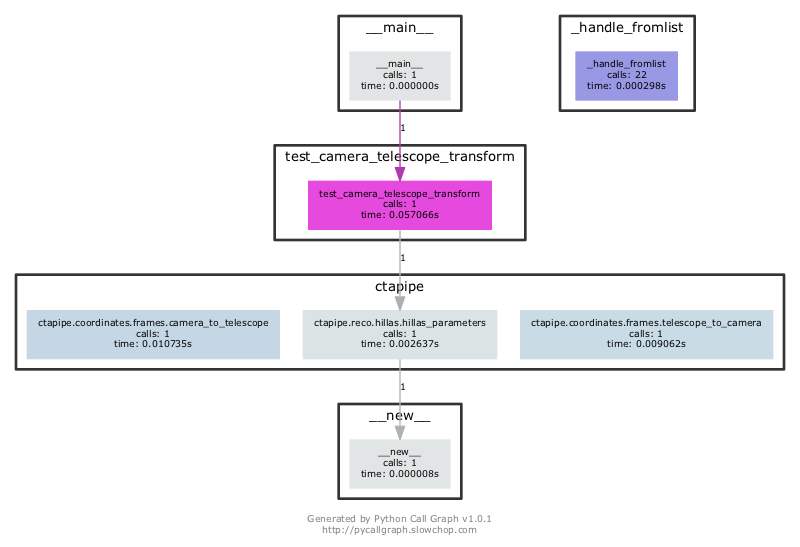

In [26]:
from IPython.display import Image
Image(filename='pycallgraph.png') 